## Ridership of Urban Bike Shares: the case of Citi Bike in NYC

![alt text](https://d21xlh2maitm24.cloudfront.net/nyc/01unlock2.JPG?mtime=20160428123800)

---

### OVERVIEW

Bike share programs have been implemented in cities around the world in an effort to address multiple aspects of both city functioning and quality of life for urban populations.  Traffic congestion, public health, community engagement, and air quality have all aspects of city life that could *potentially* be impacted by the introduction of a bike share program into a community.

One particularly massive bike share is New York City's [Citi Bike](https://www.citibikenyc.com/) program.  The area coverage of this program is large (extending into New Jersey across the Hudson River) and ridership initial adoption rates – as measured by the number of rides taken – were promising.  However this program has not been without controversy and there has been active discussion regarding which communities ara actually being served and which are not, who is benefitting from the availability of bikes, how they are being used for recreational vs commuter purposes, etc.

The goal of this assignment is two-fold: first, you will learn to work with basic tabular data from the Citi Bike program and second, you will generate a simple estimate for the <u>which age group is predominantly using citi bikes for commuter travel</u>.

---

### **PART 1 - Background**

Good data science (and data analysis more generally) as well as the appropriate application of machine learning algorithms depends on a clear understanding of the underlying problem/situation, the methods by which the data you are about to analyze are collected, and the situational context in which that data sits.  To that end:

<b>

Read through the following resources (including links within) regarding the Citi Bike program and its impacts in NYC,

1. [official Citi Bike site](https://citibikenyc.com/)

2. [DOT Facts on Citi Bike](https://www.nyc.gov/html/dot/html/pr2013/facts-on-citi-bike.shtml)

3. [Cycling in the City](https://www.nyc.gov/html/dot/downloads/pdf/cycling-in-the-city-2020.pdf)

4. [The Rise of Citi Bikes in New York City](https://thesciencesurvey.com/news/2021/03/21/the-rise-of-citi-bikes-in-new-york-city/)

</b>

### **PART 2 - Loading the data**

First things first, let's get access to the data.  To do that, we need to link this notebook with out Google Drive.  On the left there is a folder icon.  **Click that and in the popout menu click "Mount Drive" (i.e., the folder with the Google Drive icon).**  This will create a cell of code for you to run.  **Follow the instructions to link this notebook with your Google Drive.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In the menu on the left, **click the `drive` folder <small>(nb., you may need to click the folder with the refresh icon to see your `drive` folder)</small>, then `Shareddrives`, then locate the shared `mlpp25` directory**.  Inside of that is a directory called `data` and inside that is a directory called `citibike`.  In that folder is the citibike data.  **Right click on the file and select "copy path".  Put that path to the file into a string variable called `fname` and use pandas `read_csv()` function to load the data (no need to skip rows) into a pandas DataFrame called `citi`.**

In [ ]:
fname = "/content/drive/Shareddrives/mlpp25/data/citibike/JC-201604-citibike-tripdata.csv"
import pandas as pd
citi = pd.read_csv(fname)
citi.head() #verifying

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,2084,2016-04-01 00:16:13,2016-04-01 00:50:58,3203,Hamilton Park,40.727596,-74.044247,3209,Brunswick St,40.724176,-74.050656,24500,Subscriber,1979.0,1
1,324,2016-04-01 00:32:48,2016-04-01 00:38:13,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,24475,Subscriber,1954.0,1
2,387,2016-04-01 02:00:33,2016-04-01 02:07:00,3220,5 Corners Library,40.734961,-74.059503,3215,Central Ave,40.746730,-74.049251,24503,Subscriber,1975.0,1
3,140,2016-04-01 02:11:43,2016-04-01 02:14:03,3194,McGinley Square,40.725340,-74.067622,3195,Sip Ave,40.730743,-74.063784,24446,Subscriber,1981.0,1
4,142,2016-04-01 02:18:01,2016-04-01 02:20:23,3195,Sip Ave,40.730743,-74.063784,3194,McGinley Square,40.725340,-74.067622,24446,Subscriber,1981.0,1


### **PART 3 - Calculate useful metrics**

Our end goal is to get an estimate of what age riders are using citi bikes for commuter travel the most.  <u>We're going to do that by separating the trips into short and long trips and then finding the age that has the highest fraction of short trips.</u>

Let's convert a couple columns of data into some quantities that will be useful in our model below.

First, use the values from the "Birth Year" column to **calculate the age of the rider.  Add those values as a column called "age" in your `citi` DataFrame**.

In [ ]:
citi["age"] = 2016 - citi["Birth Year"] #2016 is the year that is given in the dataset

Now, extract the "Trip Duration" column (the units of which are seconds) and **take the logarithm of those using numpy's `log10()` function$^{\dagger}$.  Put them into a column in `citi` called "logdur".**

<i><small>$^{\dagger}$ recall that log10(x) = y where 10<sup>y</sup> = x, so if a trip duration is `t` = 100 seconds, `np.log10(t)` = 2 since 10<sup>2</sup> = 100.</small>

In [ ]:
import numpy as np
citi["logdur"] = np.log10(citi["Trip Duration"])
citi.head() #verifying

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,age,logdur
0,2084,2016-04-01 00:16:13,2016-04-01 00:50:58,3203,Hamilton Park,40.727596,-74.044247,3209,Brunswick St,40.724176,-74.050656,24500,Subscriber,1979.0,1,37.0,3.318898
1,324,2016-04-01 00:32:48,2016-04-01 00:38:13,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,24475,Subscriber,1954.0,1,62.0,2.510545
2,387,2016-04-01 02:00:33,2016-04-01 02:07:00,3220,5 Corners Library,40.734961,-74.059503,3215,Central Ave,40.746730,-74.049251,24503,Subscriber,1975.0,1,41.0,2.587711
3,140,2016-04-01 02:11:43,2016-04-01 02:14:03,3194,McGinley Square,40.725340,-74.067622,3195,Sip Ave,40.730743,-74.063784,24446,Subscriber,1981.0,1,35.0,2.146128
4,142,2016-04-01 02:18:01,2016-04-01 02:20:23,3195,Sip Ave,40.730743,-74.063784,3194,McGinley Square,40.725340,-74.067622,24446,Subscriber,1981.0,1,35.0,2.152288


### **PART 4 - Visualize the data and update metrics**

Since we're interested in trip durations, **use `citi`'s `.hist()` method to plot a histogram of the "Trip Duration" column of the data setting the range from 0 to 10000 seconds and using 100 bins**.

<Axes: >

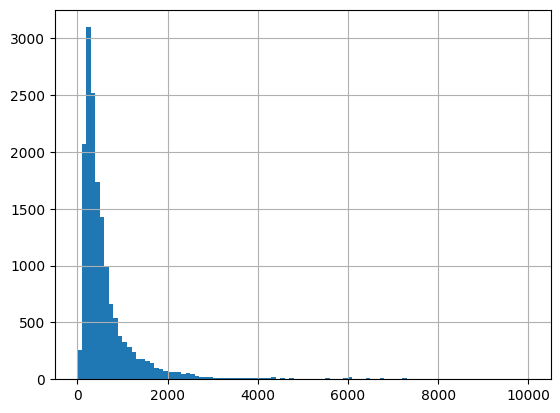

In [ ]:
citi["Trip Duration"].hist(bins=100, range=(0, 10000))

**Would you characterize this distribution as "Gaussian"?  Why or why not?**

Gaussian distribution is nothing but the normal distribution. It is usually symmetric and bell shaped. Here, it can be observed that it is not gaussian, as the graph has positive skewness, i.e., there is long tail towards right. This implies that there are fewer long trips and more shorter trips.

Now, **plot a histogram with 100 bins (no need to set the range) of the logarithm of the trip durations that you calculated above**.

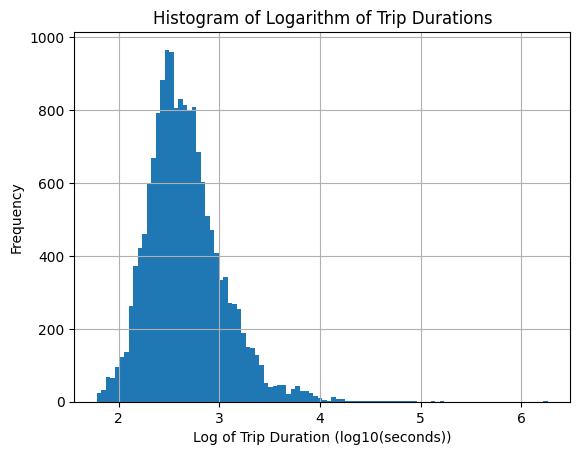

In [ ]:
citi["logdur"].hist(bins=100)

import matplotlib.pyplot as plt
plt.xlabel("Log of Trip Duration (log10(seconds))")
plt.ylabel("Frequency")
plt.title("Histogram of Logarithm of Trip Durations")
plt.show()

**Would you characterize this distribution as Gaussian?  Why or why not?**

It can be observed that there is a bell shaped curve and it is almost symmetric. So, it mostly looks like a Gaussian distribution, though there is slightly positive skewness.

The previous plot might give you a sense for how to break up the rides into "short" and "long" rides (which we'll use as a proxy for "commuter" and "recreational" respectively).  **Calculate the median of the logarithm of the trip duration.**

In [ ]:
logdur_median = citi["logdur"].median()
logdur_median

2.6138418218760693

We'll use this as the short/long dividing line.  **What is the duration of this trip in minutes?  Does that seem like a resonable time for commuting?  How far would you get in that time biking at 10 mph (and is that a reasonable biking speed)?**

Here the median of logdur is 2.6138418218760693. This is log of actual trip in secons. To understand the duration of this trip in minutes, we need to raise this value to the power of 10 (as we have used base 10 for converting it into log), and then divide by 60 to get the time in minutes.

In [ ]:
timeDur_min = 10**logdur_median/60
timeDur_min

6.8500000000000005

It can be seen that the duration of trip in minutes is 6.8500000000000005. This seems like a reasonable time for commuting for shorter trips, like moving in neighborhoods.

Given 10mph as speed, the distance travelled in that time duration can be calculated with the formula [distance = speed*time]. Here the time is in minutes, so we need to divide time (in min) by 60 to get the time in hours; as the speed is given in miles per hour (mph).

In [ ]:
speed = 10
distance = speed * (timeDur_min/60)
distance

1.1416666666666668

At 10 mph, 1.1416666666666668 miles can be travelled in 6.8500000000000005 minutes.

**Add two columns to your `citi` dataframe: a column called "short_trip" that is `True` when the trip duration is less than dividing line above and `False` otherwise, and a column called "long_trip" that is `True` when the duration is greater than or equal to the dividing line above but `False` otherwise.**

In [ ]:
citi["short_trip"] = citi["logdur"] < logdur_median
citi["long_trip"] = citi["logdur"] >= logdur_median
citi.head( ) #verifying

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,age,logdur,short_trip,long_trip
0,2084,2016-04-01 00:16:13,2016-04-01 00:50:58,3203,Hamilton Park,40.727596,-74.044247,3209,Brunswick St,40.724176,-74.050656,24500,Subscriber,1979.0,1,37.0,3.318898,False,True
1,324,2016-04-01 00:32:48,2016-04-01 00:38:13,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,24475,Subscriber,1954.0,1,62.0,2.510545,True,False
2,387,2016-04-01 02:00:33,2016-04-01 02:07:00,3220,5 Corners Library,40.734961,-74.059503,3215,Central Ave,40.746730,-74.049251,24503,Subscriber,1975.0,1,41.0,2.587711,True,False
3,140,2016-04-01 02:11:43,2016-04-01 02:14:03,3194,McGinley Square,40.725340,-74.067622,3195,Sip Ave,40.730743,-74.063784,24446,Subscriber,1981.0,1,35.0,2.146128,True,False
4,142,2016-04-01 02:18:01,2016-04-01 02:20:23,3195,Sip Ave,40.730743,-74.063784,3194,McGinley Square,40.725340,-74.067622,24446,Subscriber,1981.0,1,35.0,2.152288,True,False


Now, we're going to use a pandas dataframe trick that is quite useful (and related to similar functionality in other data analysis software) to "group" the data "by" the age using `citi`'s `.groupby()` method.  It also needs a function to perform on the groups which outputs another data frame.  If you've accomplished the above correctly, this line of code should execute without an error:

In [ ]:
citig = citi.groupby("age").sum() #groups the data by age and sums the values in numerical columns.
citig.head() #verifying

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,logdur,short_trip,long_trip
age,,,,,,,,,,,,,,,,,,
17.0,3393,2016-04-26 19:29:102016-04-29 15:43:002016-04-...,2016-04-26 19:37:432016-04-29 15:51:132016-04-...,15980,Grove St PATHPaulus HookSip Ave5 Corners Libra...,203.630178,-370.263740,15980,Paulus HookGrove St PATH5 Corners LibrarySip A...,203.630178,-370.263740,122472,SubscriberSubscriberSubscriberSubscriberSubscr...,9995.0,5,13.760617,1,4
18.0,9242,2016-04-02 19:18:442016-04-08 17:40:452016-04-...,2016-04-02 19:33:032016-04-08 17:56:242016-04-...,28797,Heights ElevatorHeights ElevatorHeights Elevat...,366.675084,-666.375402,28812,Hamilton ParkHamilton ParkHamilton ParkHamilto...,366.611724,-666.386814,221001,SubscriberSubscriberSubscriberSubscriberSubscr...,17982.0,18,27.041874,0,9
19.0,1125,2016-04-16 15:38:05,2016-04-16 15:56:51,3203,Hamilton Park,40.727596,-74.044247,3203,Hamilton Park,40.727596,-74.044247,24607,Subscriber,1997.0,2,3.051153,0,1
20.0,23395,2016-04-01 10:23:522016-04-04 09:15:152016-04-...,2016-04-01 10:35:432016-04-04 09:26:512016-04-...,111869,McGinley SquareMcGinley SquareMcGinley SquareM...,1425.350754,-2592.103091,112063,Grove St PATHNewark AveNewark AveNewark AveNew...,1425.279581,-2591.629175,858796,SubscriberSubscriberSubscriberSubscriberSubscr...,69860.0,70,95.968006,8,27
21.0,20720,2016-04-01 20:04:432016-04-04 03:02:222016-04-...,2016-04-01 20:07:042016-04-04 03:05:042016-04-...,76717,Newport PATHNewport PkwyNewport PATHGrove St P...,977.407891,-1776.809458,73898,Newport PkwyNewport PATHNewport PkwyWarren StG...,977.440750,-1776.802818,590006,SubscriberSubscriberSubscriberSubscriberSubscr...,47880.0,26,62.197159,13,11


This new dataframe should now have an index that is the age groups and two columns (called "short_trip" and "long_trip") that are the sums of short and long trips for that age group.  **Get the total number of trips for that age group by adding those together.**

In [ ]:
citig["total_trips"] = citig["short_trip"] + citig["long_trip"]
citig.head() #verifying

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,logdur,short_trip,long_trip,total_trips
age,,,,,,,,,,,,,,,,,,,
17.0,3393,2016-04-26 19:29:102016-04-29 15:43:002016-04-...,2016-04-26 19:37:432016-04-29 15:51:132016-04-...,15980,Grove St PATHPaulus HookSip Ave5 Corners Libra...,203.630178,-370.263740,15980,Paulus HookGrove St PATH5 Corners LibrarySip A...,203.630178,-370.263740,122472,SubscriberSubscriberSubscriberSubscriberSubscr...,9995.0,5,13.760617,1,4,5
18.0,9242,2016-04-02 19:18:442016-04-08 17:40:452016-04-...,2016-04-02 19:33:032016-04-08 17:56:242016-04-...,28797,Heights ElevatorHeights ElevatorHeights Elevat...,366.675084,-666.375402,28812,Hamilton ParkHamilton ParkHamilton ParkHamilto...,366.611724,-666.386814,221001,SubscriberSubscriberSubscriberSubscriberSubscr...,17982.0,18,27.041874,0,9,9
19.0,1125,2016-04-16 15:38:05,2016-04-16 15:56:51,3203,Hamilton Park,40.727596,-74.044247,3203,Hamilton Park,40.727596,-74.044247,24607,Subscriber,1997.0,2,3.051153,0,1,1
20.0,23395,2016-04-01 10:23:522016-04-04 09:15:152016-04-...,2016-04-01 10:35:432016-04-04 09:26:512016-04-...,111869,McGinley SquareMcGinley SquareMcGinley SquareM...,1425.350754,-2592.103091,112063,Grove St PATHNewark AveNewark AveNewark AveNew...,1425.279581,-2591.629175,858796,SubscriberSubscriberSubscriberSubscriberSubscr...,69860.0,70,95.968006,8,27,35
21.0,20720,2016-04-01 20:04:432016-04-04 03:02:222016-04-...,2016-04-01 20:07:042016-04-04 03:05:042016-04-...,76717,Newport PATHNewport PkwyNewport PATHGrove St P...,977.407891,-1776.809458,73898,Newport PkwyNewport PATHNewport PkwyWarren StG...,977.440750,-1776.802818,590006,SubscriberSubscriberSubscriberSubscriberSubscr...,47880.0,26,62.197159,13,11,24


**Plot the fraction of trips that are short as a function of age group.**$^{\dagger}$

<small>$^{\dagger}$ you can access the index values of a dataframe like so: `age_group = citig.index`</small>

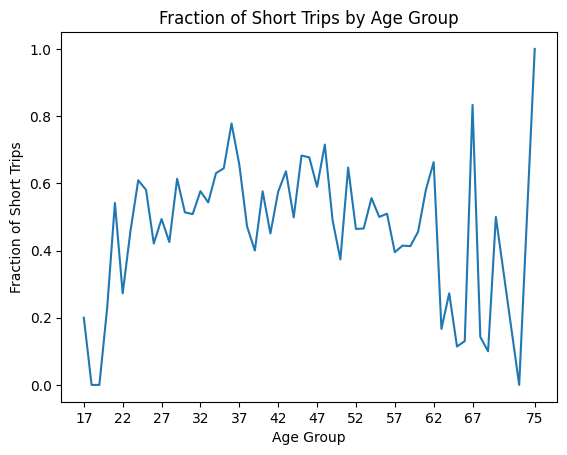

In [ ]:
#plotting fraction of trips that are short as a function of age group.
citig["shortTrip_frac"] = citig["short_trip"]/citig["total_trips"]

#Here, after the new data frame is created by grouping the data by age, there is no age column now, it acts as an index in the new data frame
age_group = citig.index
plt.plot(age_group, citig["shortTrip_frac"])

plt.xlabel("Age Group")
plt.ylabel("Fraction of Short Trips")
plt.title("Fraction of Short Trips by Age Group")
plt.xticks(citig.index[::5])
plt.show()

**What is the age group that is predominantly using citi bikes for commuting?  How did you make that determination?**

It can be observed that the fraction of short trips by age group is highest for the age group of 75. Therefore, 75 is the age group is predominantly using citi bikes for commuting.

**What are the assumptions that went into finding this model?  And how do your findings relate to the information in the resources in Part 1?**

The assumptions that went into finding this model:

1. We assumed that short trips are primarily used for commuting rather than recreational purposes. As the commuting time required for moving in the neighborhood or between stores or workplace typically requires less than 20min.
2. It was also assumed that different age groups might have different biking habits, like older people using Citi Bikes more for practical commuting.
3. We assumed the data is accurate and free of significant errors.
4. It was assumed that the data we analyzed reflects the actual patterns of Citi Bike use in New York City.

These assumptions align with insights from the Citi Bike program's growth in NYC, as seen in the official Citi Bike site and DOT Facts. It was said that biking has become increasingly popular across all age groups due to its convenience and environmental benefits.
The trend observed in the analysis, where older age groups are using Citi Bikes for commuting, fits with broader patterns in the city, where bikes are becoming a favored choice for short-distance travel, especially for those who might avoid heavier traffic or public transport, and is less risky compared to other commuting vehicles.

**Fit a model parameter by hand (aka: "fit by eye")**

Let's approximate the number of short trips as a function of age group by a parabola.  Here's the function we'll use:

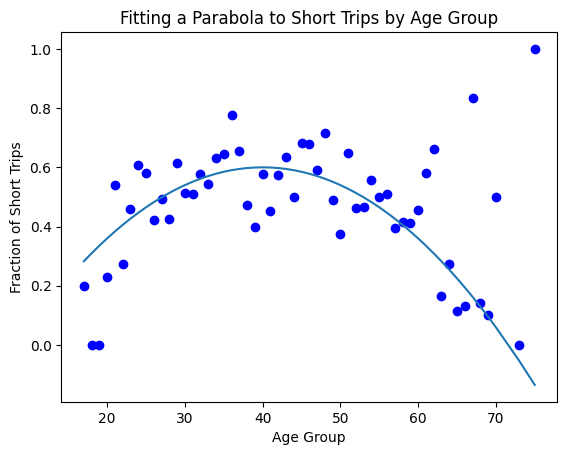

In [ ]:
def short_by_age(age_groups, peak_age, peak_value):
  """
  Generate a model for the fraction of trips that are short as a
  function of age group.
  """
  model = -6e-4 * (age_groups - peak_age)**2 + peak_value
  return model

citig["short_trip_fraction"] = citig["short_trip"] / citig["total_trips"]


peak_age = 40
peak_value = 0.6

model_values = short_by_age(citig.index, peak_age, peak_value)

plt.plot(citig.index, citig["short_trip_fraction"], 'bo') #actual data
plt.plot(citig.index, model_values, ) #Fitted Model
plt.xlabel("Age Group")
plt.ylabel("Fraction of Short Trips")
plt.title("Fitting a Parabola to Short Trips by Age Group")
plt.show()

**Use the above function to fit the `peak_age` and `peak_value` parameters "by eye".**  By that I mean, choose some values, plot it, chose a new value and plot it to see if it fits better by eye, then repeat until you have something that looks reasonable.

I have tried with different values manually, for the parameters, peakage and peakvalue. At the end, i feel the model is nearly a perfect fit with peakage = 40 and peakvalue = 0.6, though it is not that perfect as the points are scattered around randomly around the fitted line. But here, it can be seen that the age group 70 becomes as an outlier, while it is the actual result for the age group that is predominantly using the bikes for shorter trips. But as we observe in a bigger picture, i feel this plot fits nearly perfectly for the points.